In [1]:
import numpy as np
from spec_id import Gen_sim, Scale_model
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
import rpy2
import rpy2.robjects as robjects
R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

%matplotlib inline


In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
Age=np.arange(.15,6.05,.05)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
ultau=np.append(0.0,10**(np.array(tau[1:])-9))
M,A=np.meshgrid(metal,age)
lwa_grid = np.load('../data/light_weight_scaling_3.npy')
col_list = sea.mpl_palette('terrain',ultau[1:].size)


In [42]:
ultau

array([ 0.        ,  0.1       ,  0.19952623,  0.30199517,  0.39810717,
        0.50118723,  0.60255959,  0.70794578,  0.79432823,  0.89125094,
        1.        ,  1.0964782 ,  1.20226443,  1.28824955,  1.41253754,
        1.51356125,  1.58489319,  1.69824365,  1.81970086,  1.90546072,
        1.99526231,  2.08929613,  2.18776162,  2.29086765,  2.39883292,
        2.51188643,  2.57039578,  2.6915348 ,  2.81838293,  2.8840315 ,
        3.01995172])

In [48]:
UL_tau = np.round(ultau,1)*4

In [54]:
for i in range(len(ldist)-1):
    if .5 <= UL_tau[i] <= 6: 
        print ultau[i] * 2
        print lwa_grid[17][np.argwhere(np.round(age,1) == UL_tau[i])[0][0]][i]
        
        print (ultau[i] * 2 -lwa_grid[17][np.argwhere(np.round(age,1) == UL_tau[i])[0][0]][i]) /lwa_grid[17][np.argwhere(np.round(age,1) == UL_tau[i])[0][0]][i]


0.399052462994
0.460689228851
-0.13379250479
0.60399034408
0.682188893543
-0.114628880949
0.796214341107
0.902833477333
-0.118093910896
1.00237446725
1.1013318637
-0.0898524774457
1.20511917215
1.27564516634
-0.0552865295537
1.41589156877
1.42027389236
-0.00308554822766
1.58865646945
1.5760013419
0.00802989642745
1.78250187627
1.71500223907
0.0393583376499
2.0
1.84267170698
0.0853805332893
2.19295639229
1.97912836585
0.1080415147
2.40452886923
2.09664565639
0.146845611185
2.57649910339
2.21408813569
0.163684074655
2.82507508925
2.2631865482
0.248273188746
3.02712249687
2.23105964735
0.356809308288


In [26]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)


def t_avg(tau):   
    iage = np.arange(0,6.01,.01)

    hiressfh=SFH(iage,tau)
    
    top = np.zeros(len(iage)-1)
    bottom = np.zeros(len(iage)-1)
    
    for i in range(len(iage)-1):
        top[i] = np.trapz(hiressfh[0:i+1] * (iage[i+1] - iage[0:i+1]),iage[0:i+1])
        bottom[i] = np.trapz(hiressfh[0:i+1],iage[0:i+1])
    
    return   interp1d(np.arange(0.01,6.01,.01),top/bottom)(age)


$t_{lwa} < t^* - 2 \tau$

$t^* = 4 \tau$

$t_{lwa} < 2 \tau$

In [3]:
print lwa_grid[17][20][3]

ldist =np.zeros([len(tau),age.size])

for i in range(len(tau)):
    l_dummy =np.zeros(age.size)
    for ii in range(age.size):
        l_dummy[ii] = lwa_grid[17][ii][i]
    ldist[i] = l_dummy


1.86757922067


In [14]:
ldist[1]

array([ 0.31660446,  0.40712244,  0.50188422,  0.59914083,  0.69776528,
        0.79709937,  0.896786  ,  0.99664187,  1.09657684,  1.19654795,
        1.2965353 ,  1.39652982,  1.49652747,  1.59652647,  1.69652605,
        1.79652587,  1.8965258 ,  1.99652577,  2.09652575,  2.19652575,
        2.29652575,  2.39652575,  2.49652575,  2.59652575,  2.69652575,
        2.79652575,  2.89652575,  2.99652575,  3.09652575,  3.19652575,
        3.29652575,  3.39652575,  3.49652575,  3.59652575,  3.69652575,
        3.79652575,  3.89652575,  3.99652575,  4.09652575,  4.19652575,
        4.29652575,  4.39652575,  4.49652575,  4.59652575,  4.69652575,
        4.79652575,  4.89652575,  4.99652575,  5.09652575,  5.19652575,
        5.29652575,  5.39652575,  5.49652575,  5.59652575,  5.69652575,
        5.79652575])

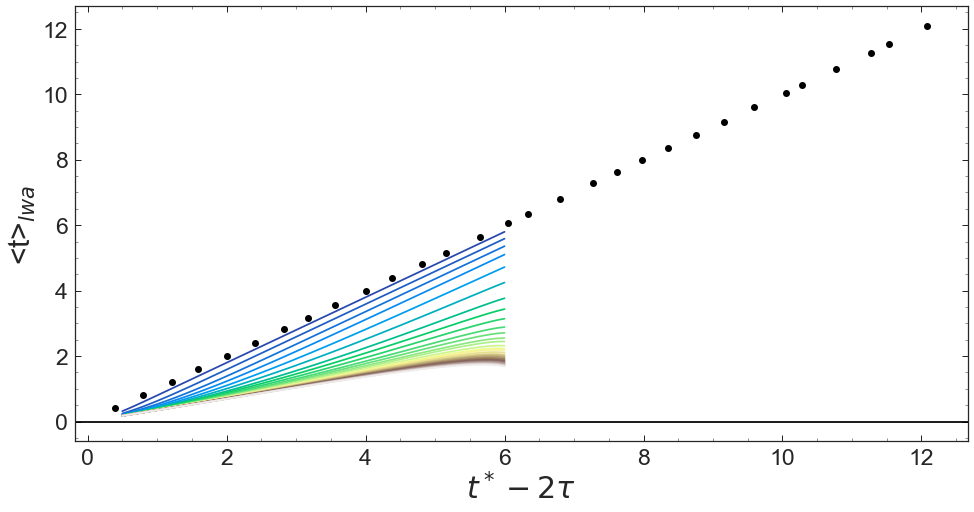

In [35]:
plt.figure(figsize=[16,8])

plt.axhline(0,color='k')
for i in range(len(ldist)-1):
    plt.plot(age, ldist[i+1],color=col_list[i])
    plt.plot(ultau[i+1]*4,ultau[i+1]*4,'ko')
#     if .5 <= ultau[i+1]*3 <= 6: 
#         plt.plot(ultau[i+1]*3,interp1d(ldist[i+1],age - ldist[i+1] - 2*ultau[i+1])(ultau[i+1]*3),'ko')

plt.xlabel('$t^* - 2 \\tau$',fontsize=30)
plt.ylabel('<t>$_{lwa}$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
# plt.ylim(0,6)
# plt.xlim(0,6)



In [39]:
for i in range(len(ldist)-1):
    if .5 <= ultau[i+1]*4 <= 6: 
        print interp1d(age,(age - 2*ultau[i+1]- ldist[i+1]) / ldist[i+1])(ultau[i+1]*4)

-0.131298821404
-0.123188611665
-0.112614568964
-0.0928901462889
-0.0607526692917
-0.0177244268148
0.0168928542567
0.0517752304038
0.0853805332893
0.112150344836
0.144421650549
0.174292310786
0.240958774106


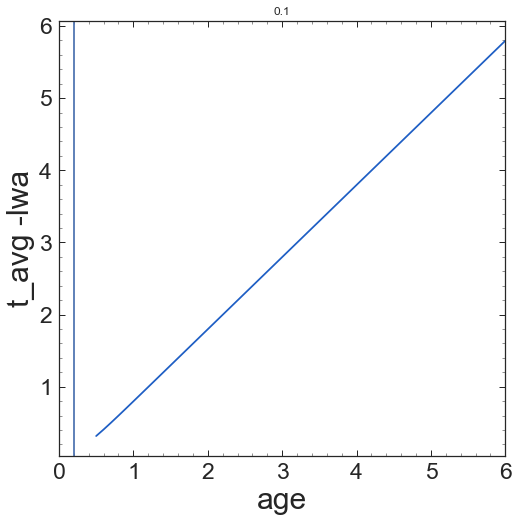

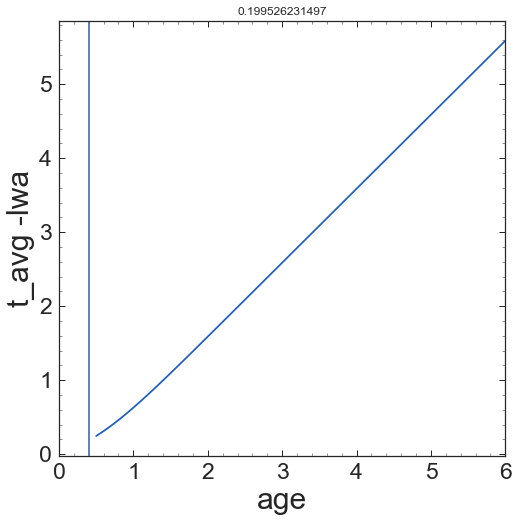

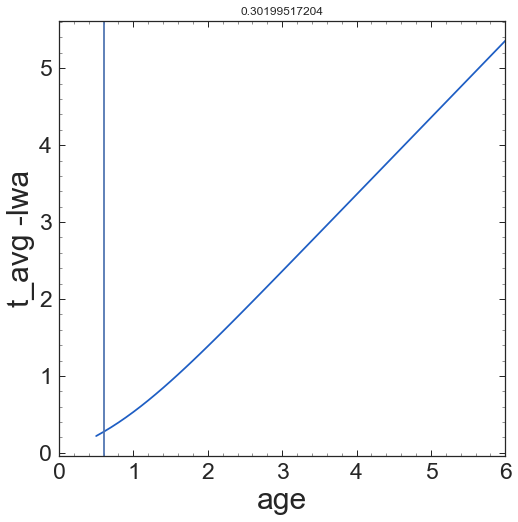

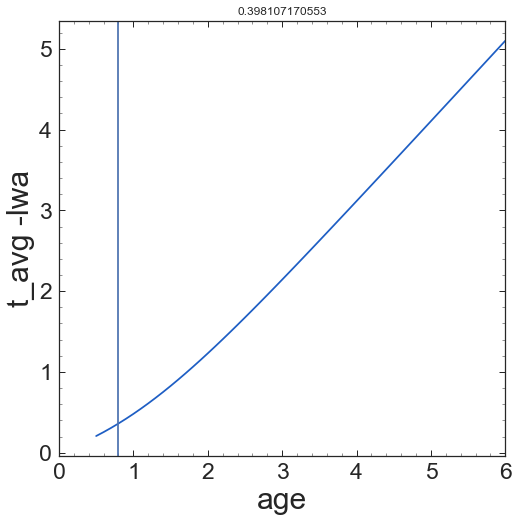

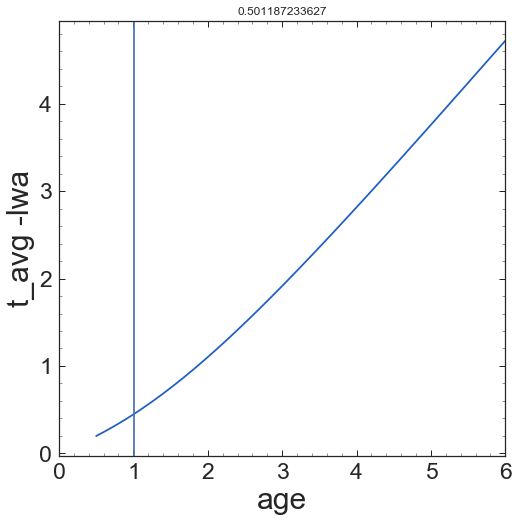

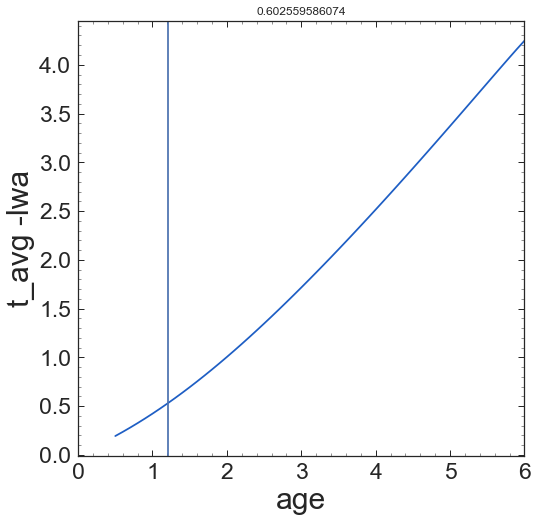

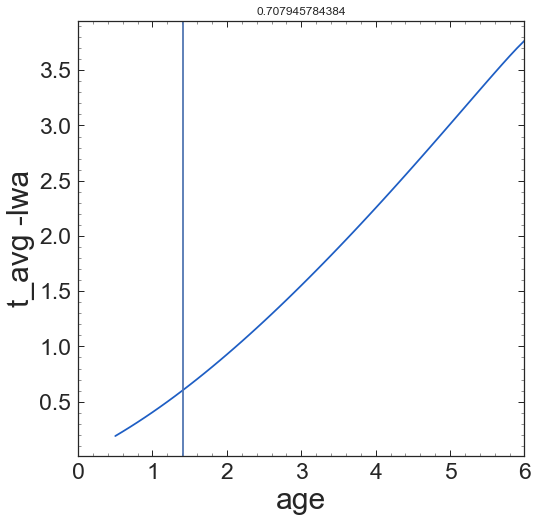

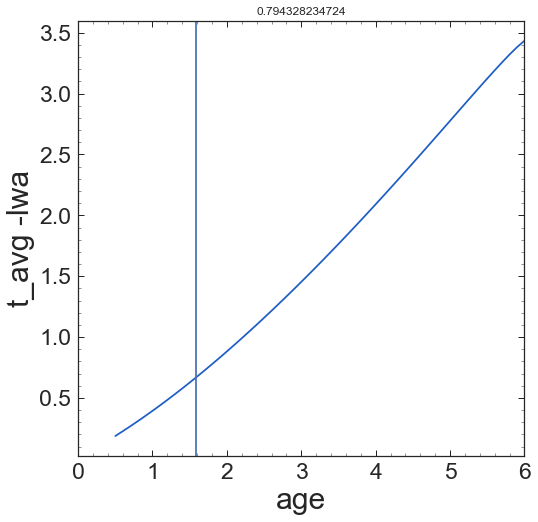

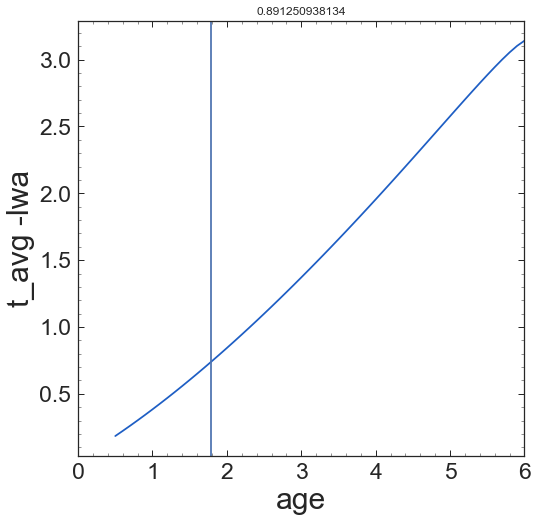

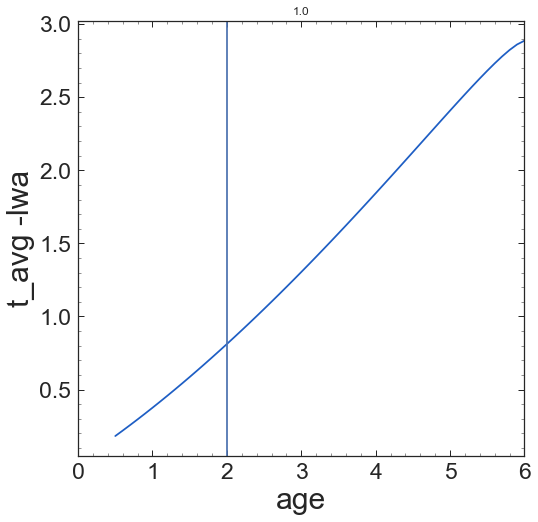

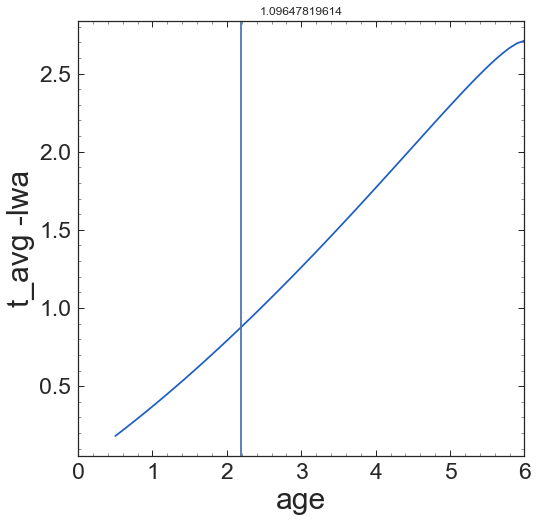

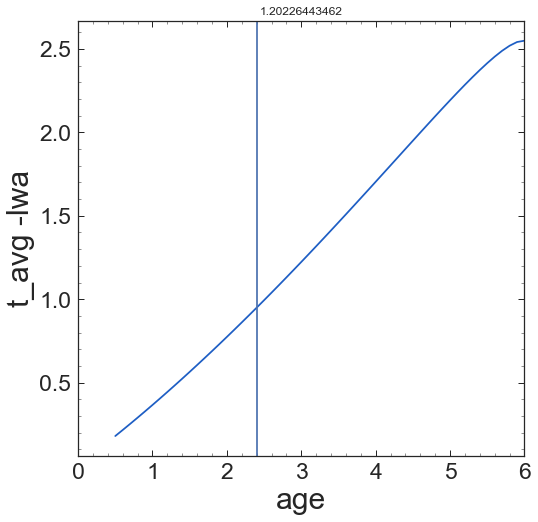

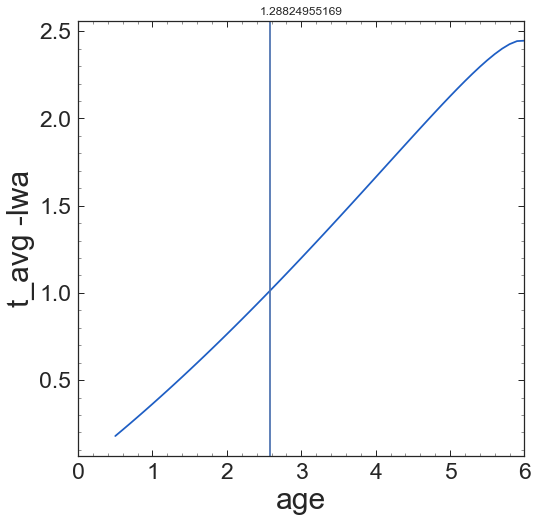

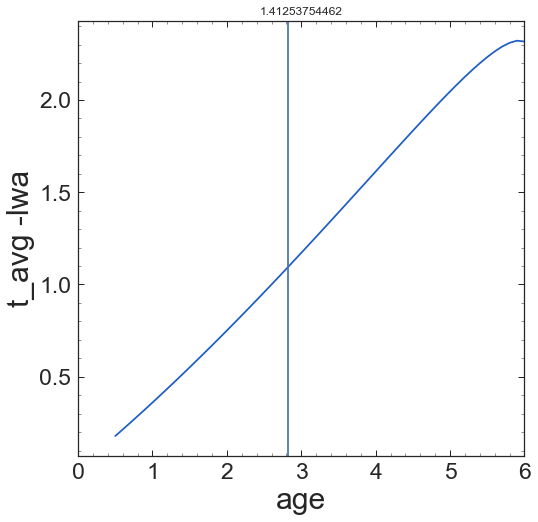

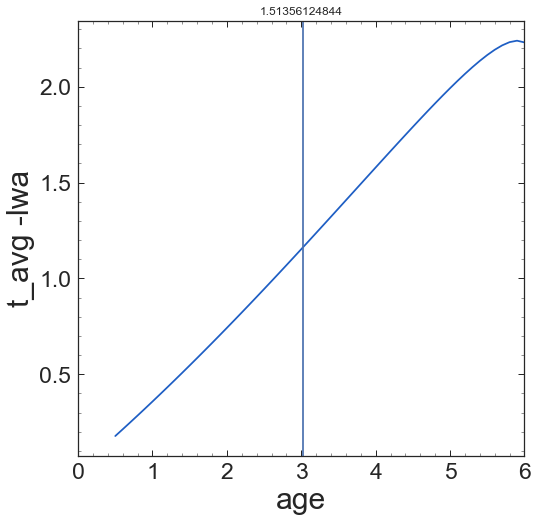

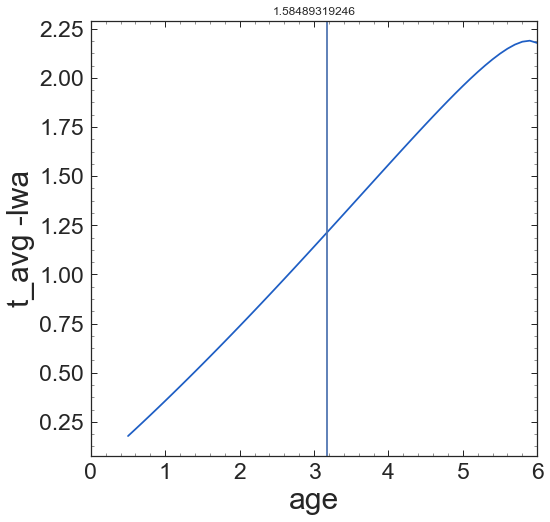

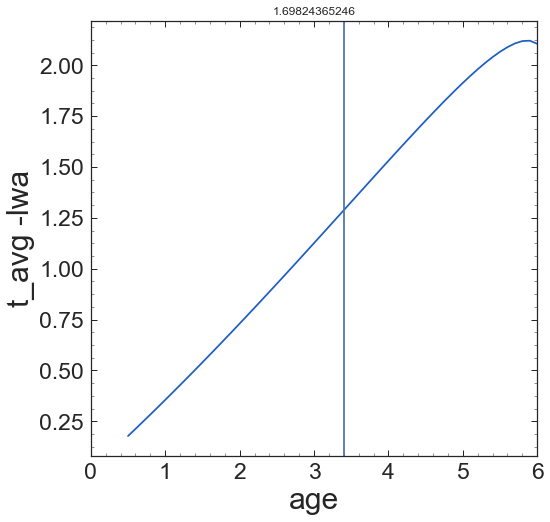

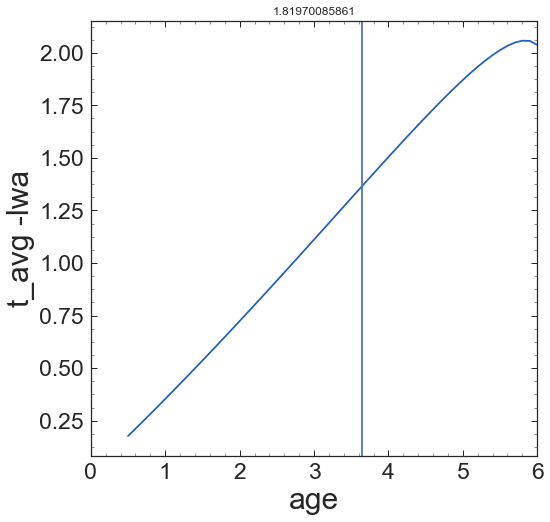

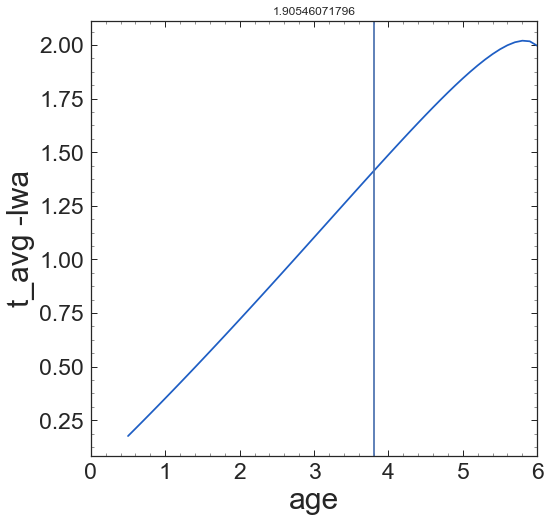

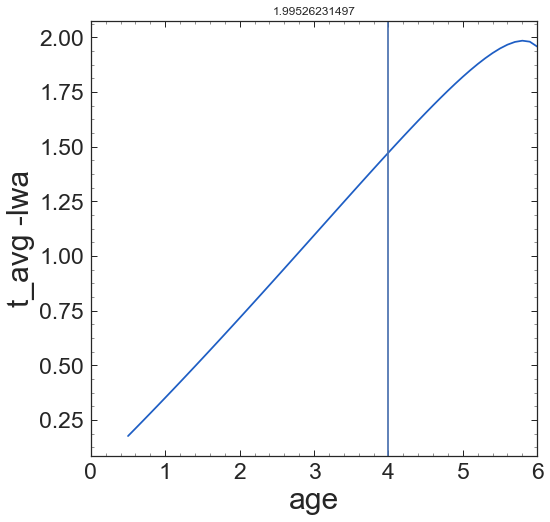

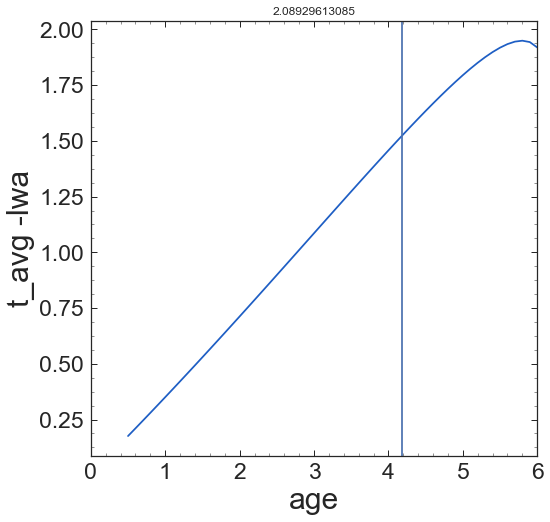

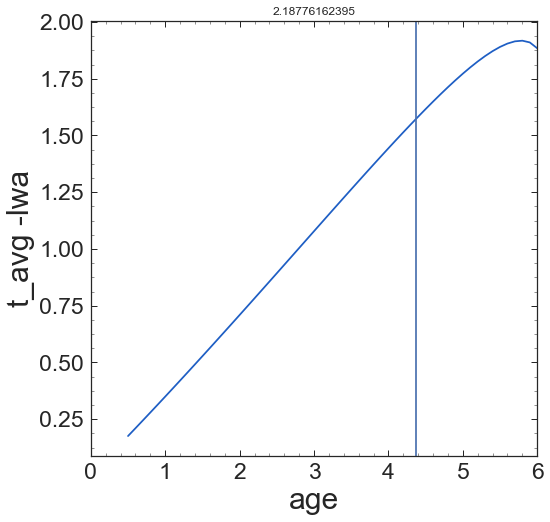

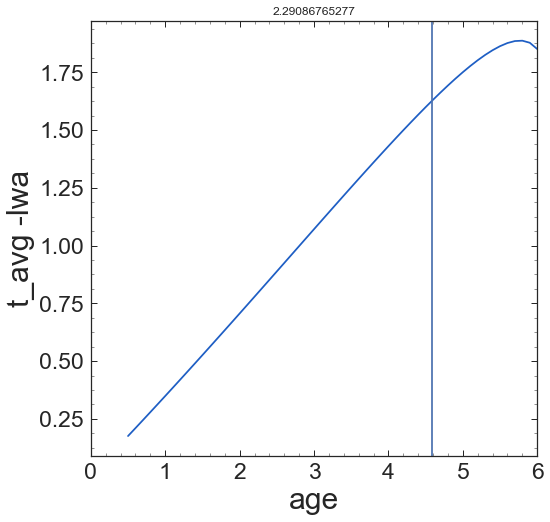

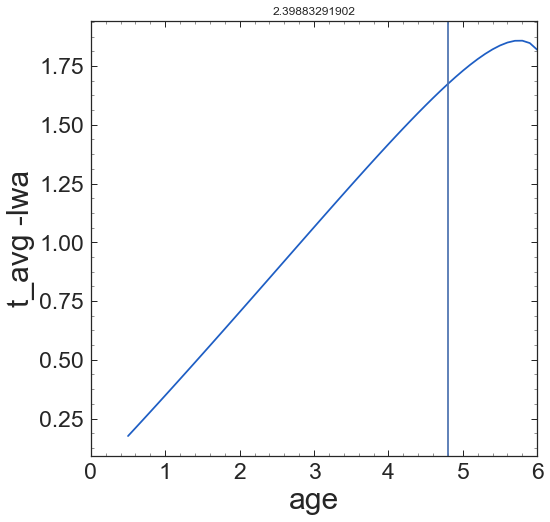

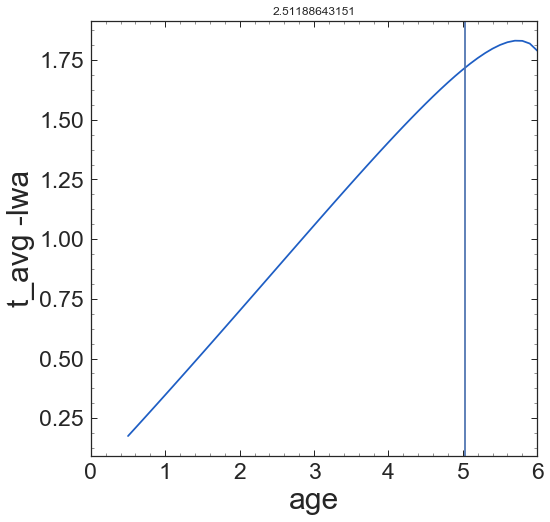

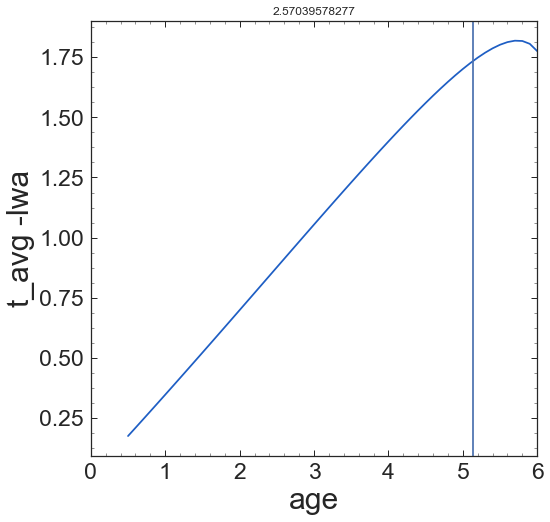

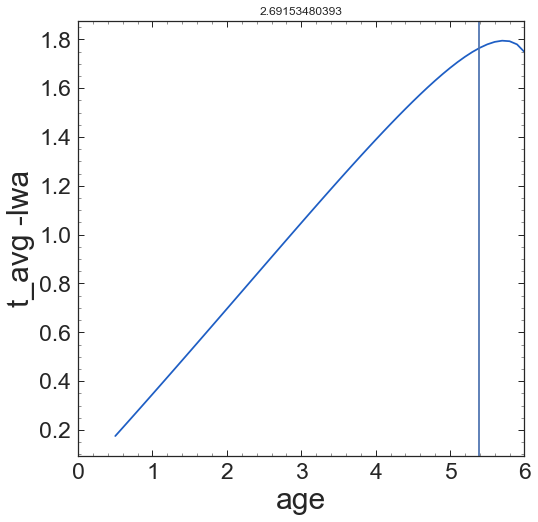

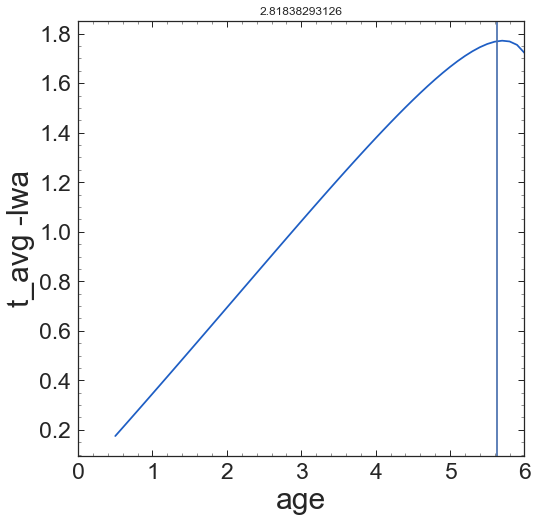

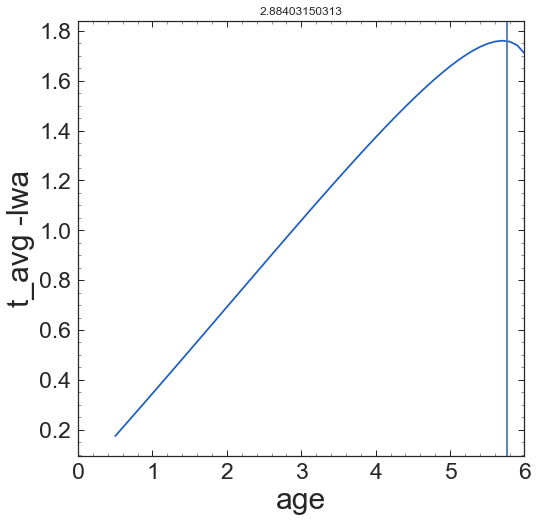

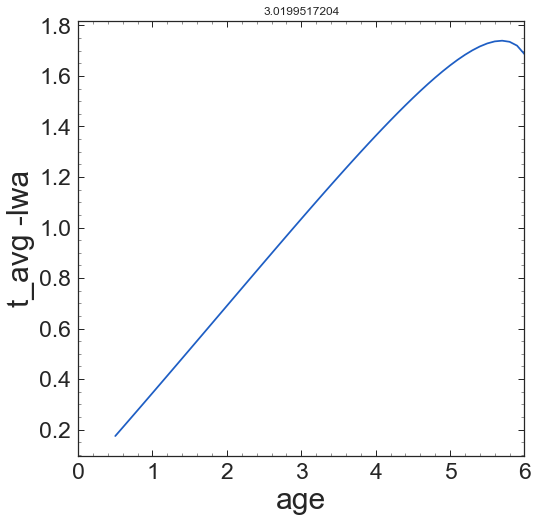

In [41]:
for i in range(len(tau)-1):
    plt.figure(figsize=[8,8])
    plt.plot(age,ldist[i+1] ,color=col_list[1])
    plt.axvline(2*ultau[i+1])
    plt.ylabel('t_avg -lwa',fontsize=30)
    plt.xlabel('age',fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.minorticks_on()
    plt.xlim(0,6)
#     plt.ylim(-0.1,1)
    plt.title(ultau[i+1])


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


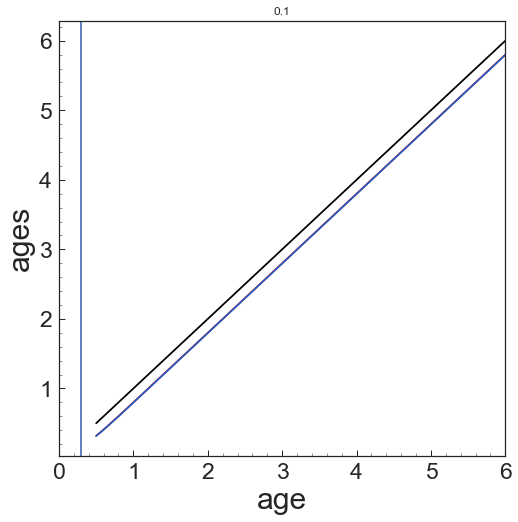

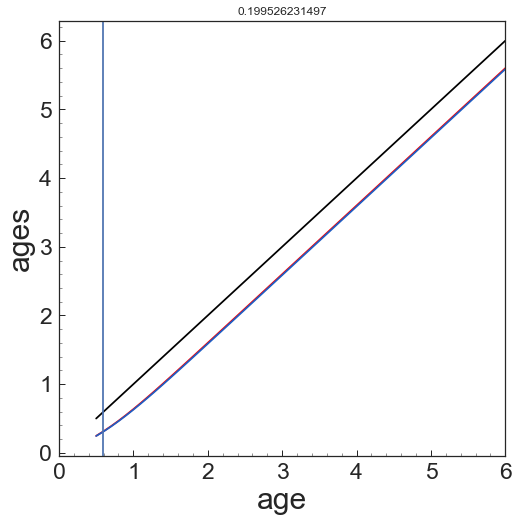

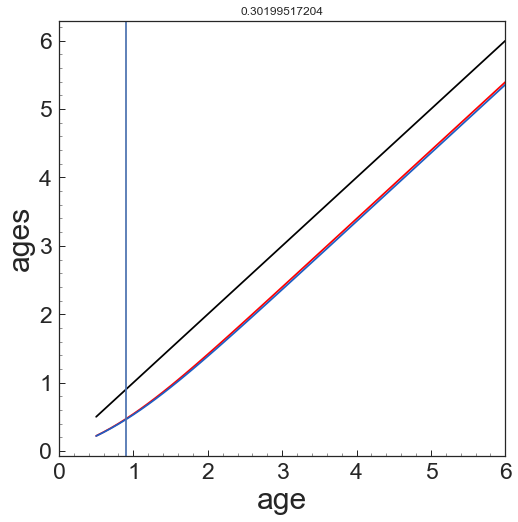

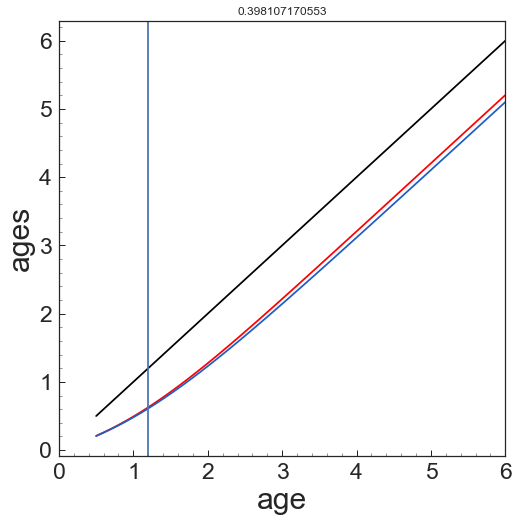

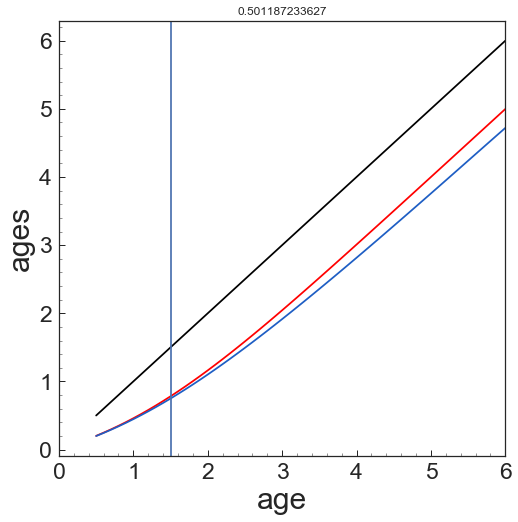

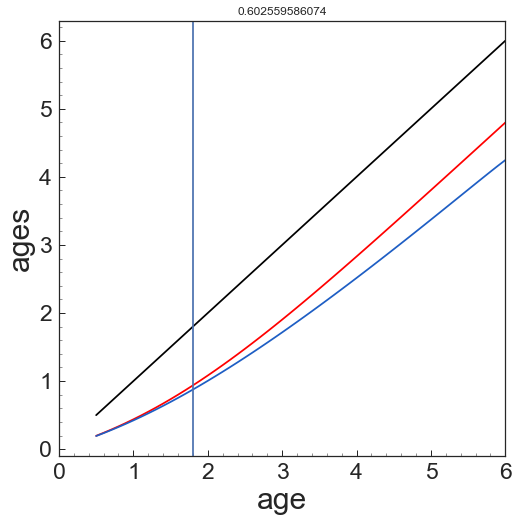

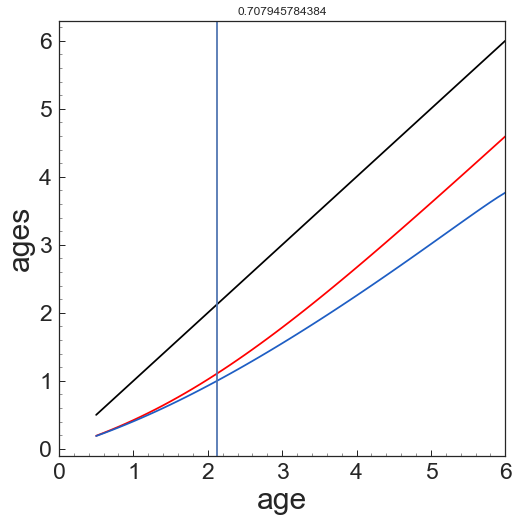

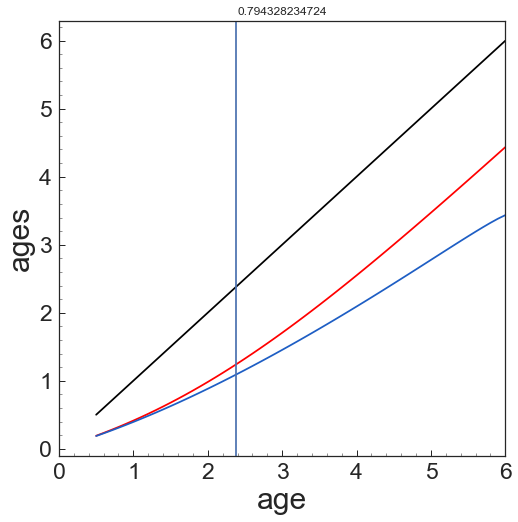

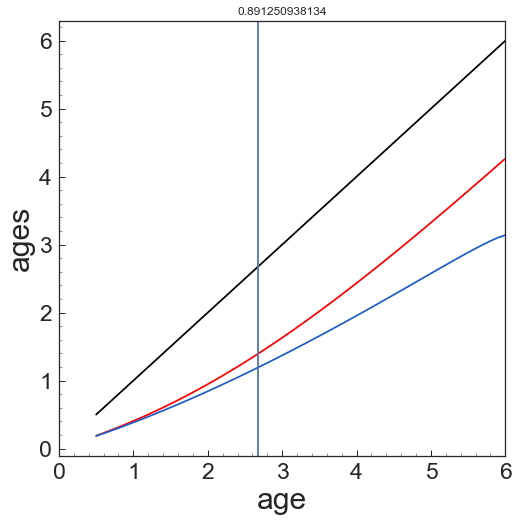

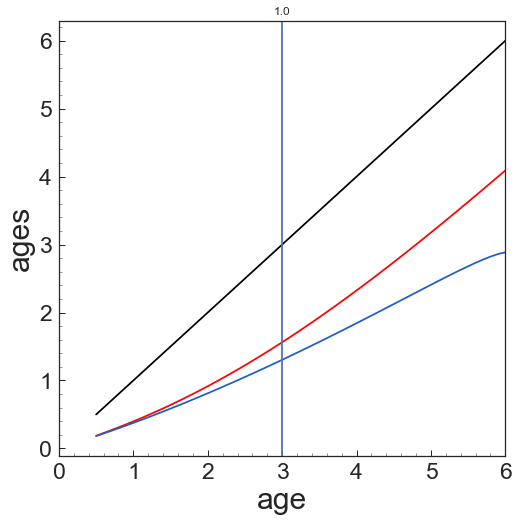

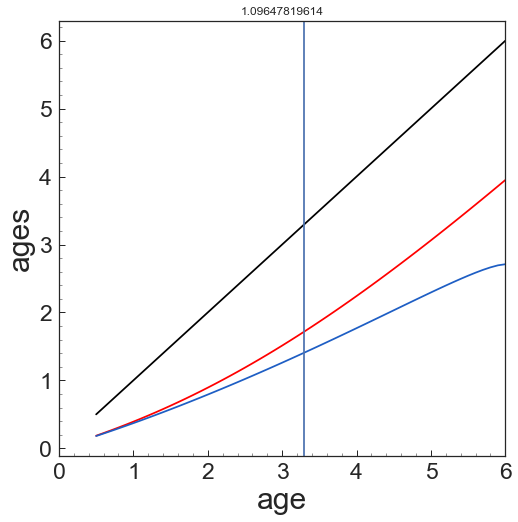

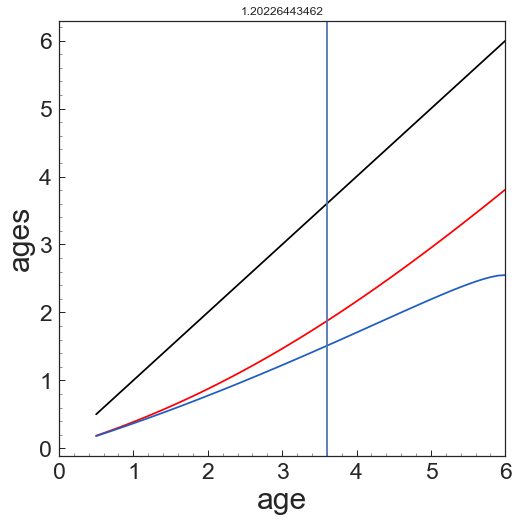

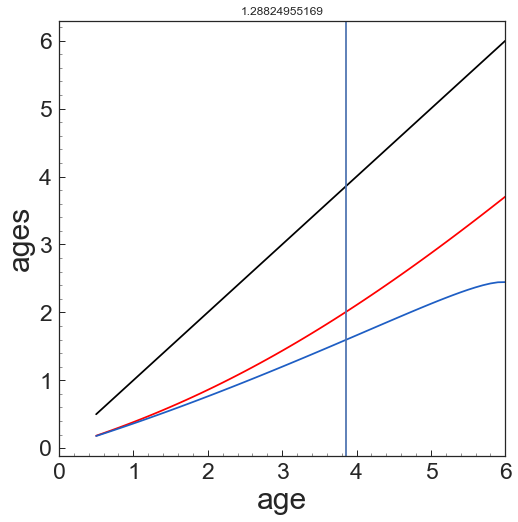

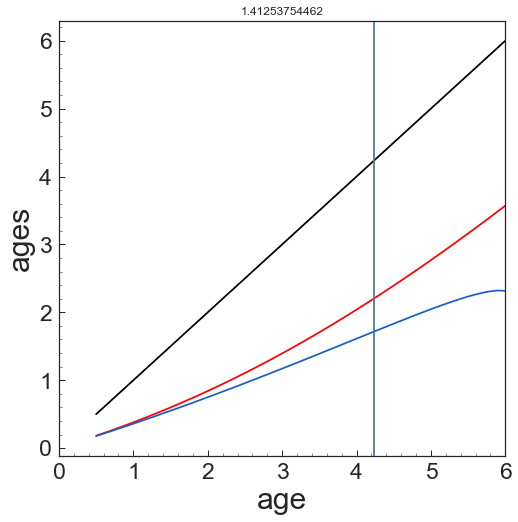

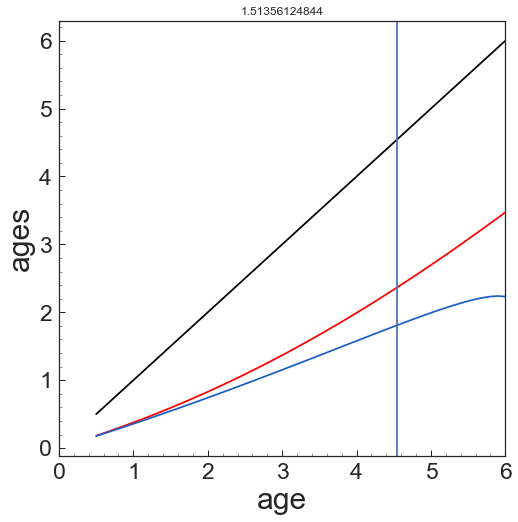

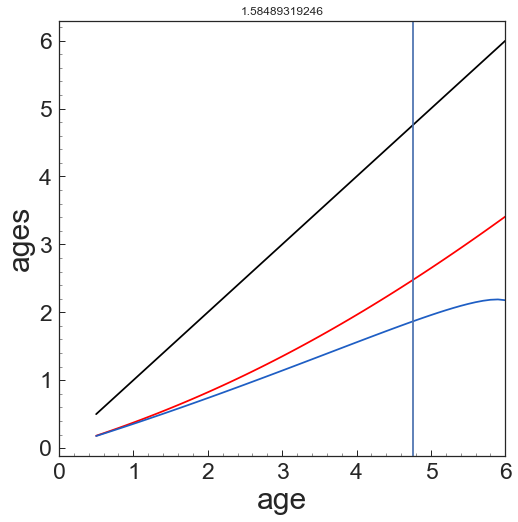

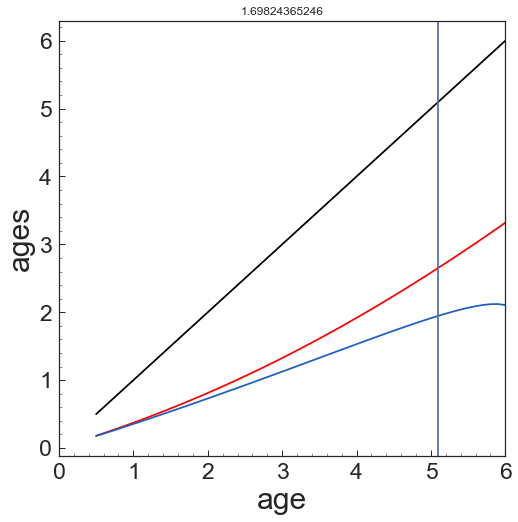

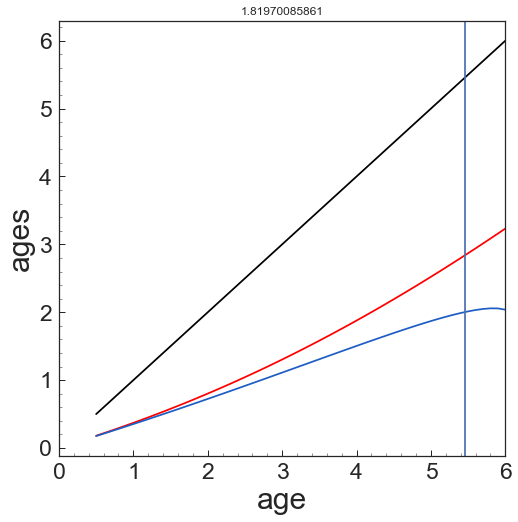

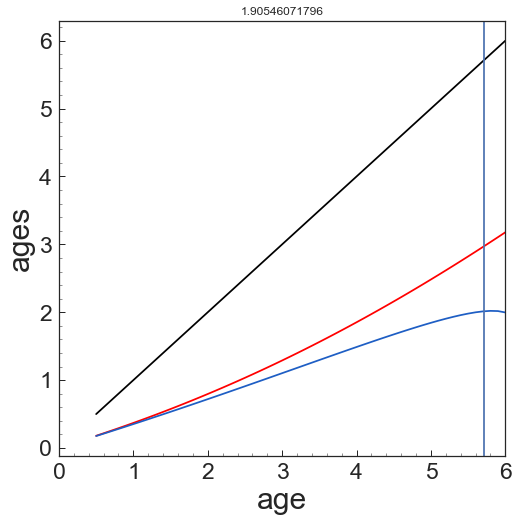

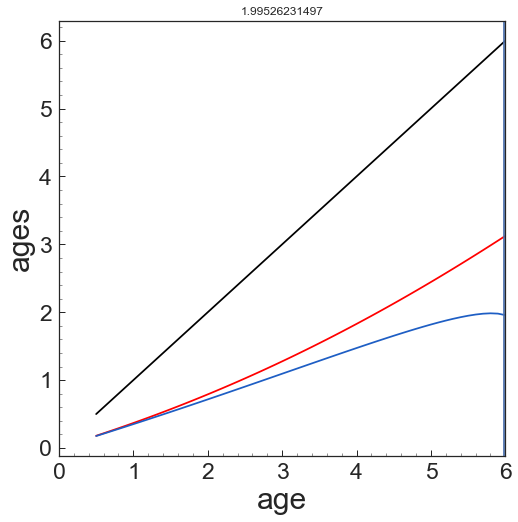

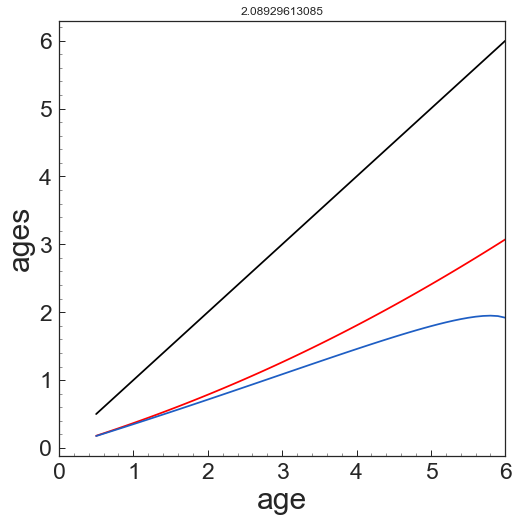

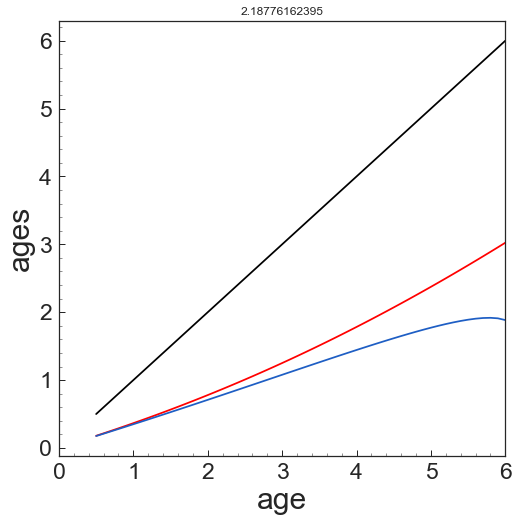

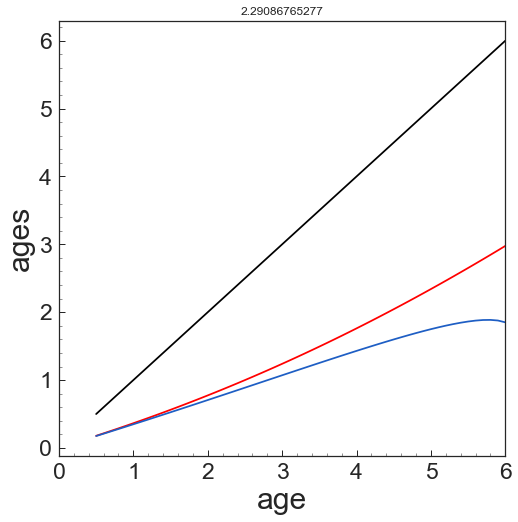

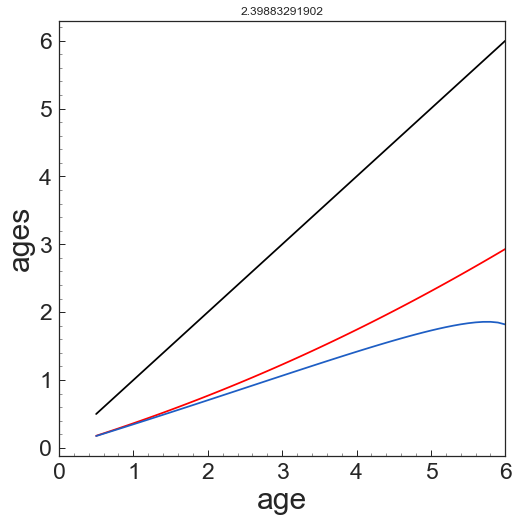

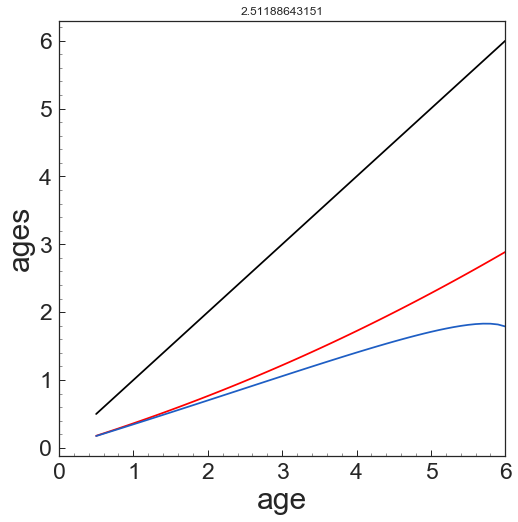

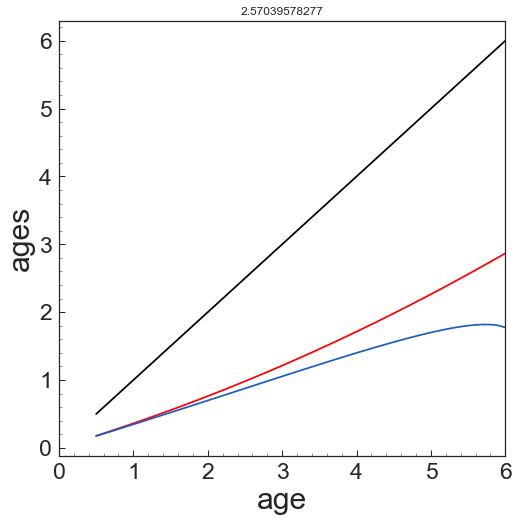

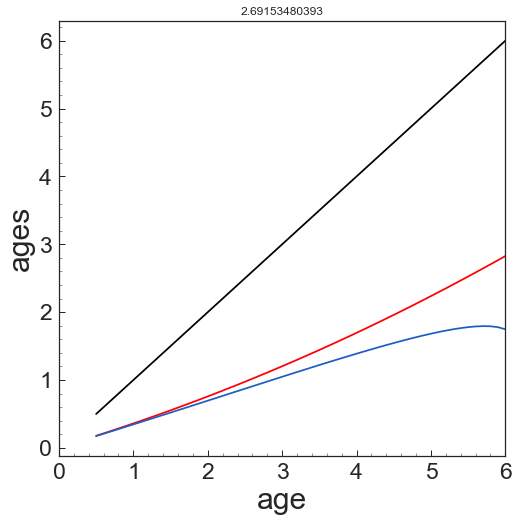

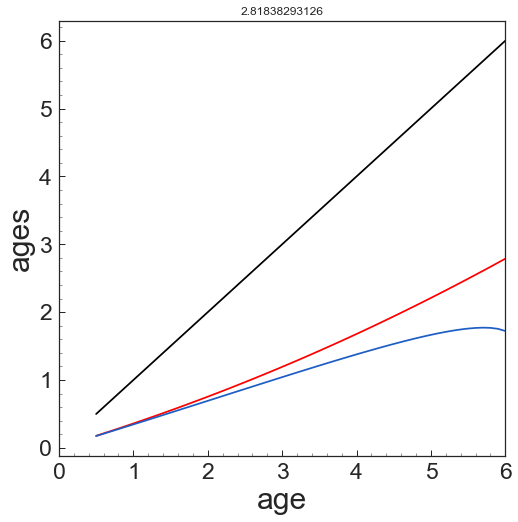

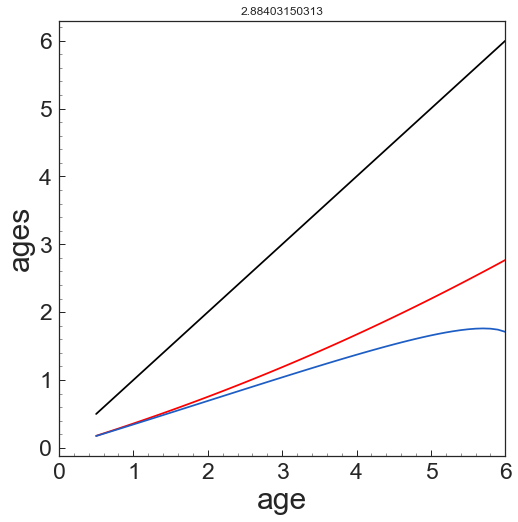

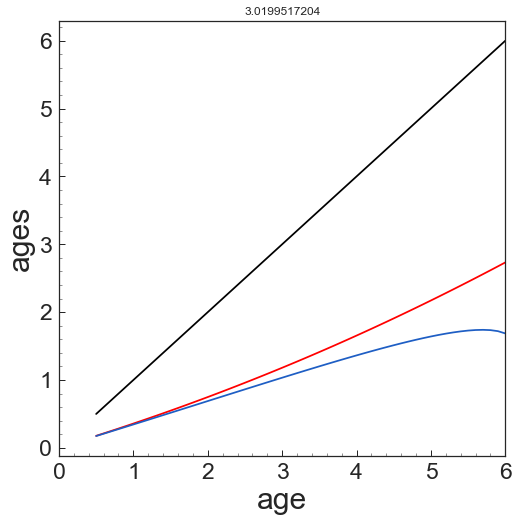

In [47]:
for i in range(len(tau)-1):
    plt.figure(figsize=[8,8])
    plt.plot(age,age,'k')
    plt.plot(age,t_avg(ultau[i+1]),'r')
    plt.plot(age,ldist[i+1],color=col_list[1])
    plt.axvline(3*ultau[i+1])
    plt.ylabel('ages',fontsize=30)
    plt.xlabel('age',fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.minorticks_on()
    plt.xlim(0,6)
    plt.title(ultau[i+1])